#### Assignment: Building a Custom Visualization


In [1]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame({"1992":np.random.normal(32000,200000,3650), 
                   "1993":np.random.normal(43000,100000,3650), 
                   "1994":np.random.normal(43500,140000,3650), 
                   "1995":np.random.normal(48000,70000,3650)})
df.head()

,1992,1993,1994,1995
0,-8941.531897,-51896.094813,152336.932066,-69708.439062
1,127788.667612,198350.518755,192947.128056,-13289.977022
2,-71887.743011,-123518.252821,389950.263156,-30178.390991
3,-79146.060869,-129916.759685,-93006.152024,55052.181256
4,425156.114501,216119.147314,100818.575896,152883.621657


In [2]:
#In this assignment we are considering 95% confidence interval meaning z=1.96
#but first let's find the mean and standard deviation of these years
me =[]
st=[]
for i in df:
    m=df[i].mean()
    s=df[i].std()
    me.append(m)
    st.append(s)

In [3]:
#calculate the confidence interval

import math
lower_bound=[]
upper_bound=[]
rang=[]
n=[len(df[i]) for i in df]
for i in range(4):
    l=(-1.96*(st[i]/math.sqrt(n[i])))+me[i]
    u=(1.96*(st[i]/math.sqrt(n[i])))+me[i]
    r=u-l
    lower_bound.append(l)
    upper_bound.append(u)
    rang.append(r)
#we need to adjust the confidence inteval based
z=[x/2 for x in rang]


In [4]:
#defining a function that returns colors
threshold = float(input("Enter your threshold: "))
def color(y,low,up):
    if y> up:
        return 'blue'
    if (y<=up) & (y>= low):
        return 'white'
    if y<low:
        return 'red'
a=[]
for i in range(4):
    a.append(color(threshold,lower_bound[i],upper_bound[i]))

Enter your threshold: 3


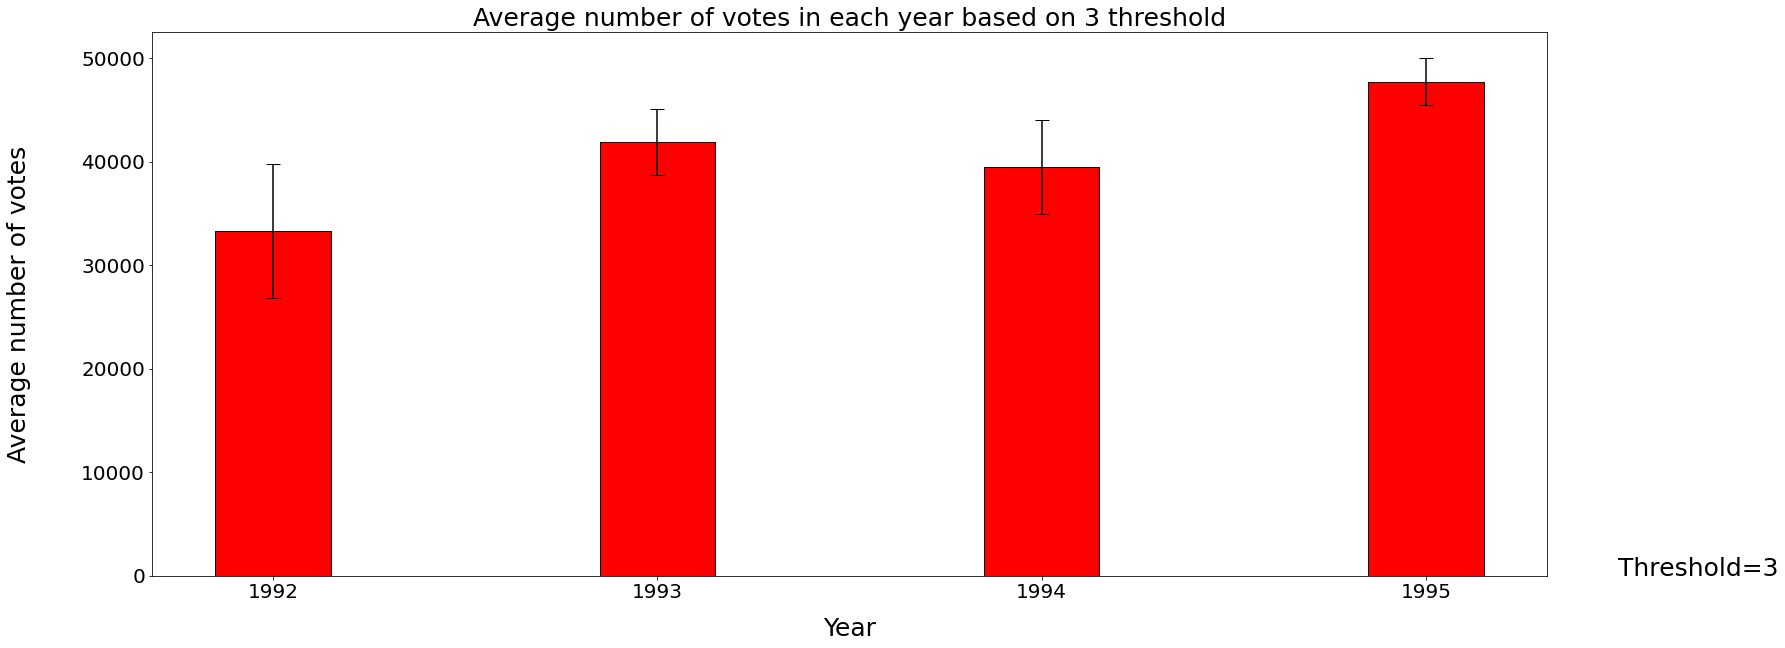

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 10))
barWidth = 0.3
labels=[0,1,2,3]
years=['1992','1993','1994','1995']
plt.bar(labels,me,  width = barWidth, color = a, edgecolor = 'black', yerr=z, capsize=7,align='center')
plt.axhline(y=threshold,linestyle='--',linewidth=1, color='k')
plt.text(3.5, threshold, 'Threshold=%d' %threshold,fontsize=25)
plt.xticks(labels,years,fontsize =20)
plt.yticks(fontsize=20)
plt.ylabel('Average number of votes',labelpad=50,fontsize=25)
plt.xlabel('Year',labelpad=15,fontsize=25)
plt.title('Average number of votes in each year based on {} threshold'.format(int(threshold)),fontsize=25)
plt.show()